---
__Implementing a Key-Value Database__

---

The goal of this guided project is to extend the BTree implementation to implement a key-value store class named KVStore

In [1]:
# Import 
from btree import BTree

In [2]:
# Initialise and modify add()
class KVStore(BTree):
    def __init__(self):
        super().__init__(split_threshold = 2)
        
    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            super().add(key, value)
        else:
            for i, n_key in enumerate(node.keys):
                if n_key == key:
                    node.values[i] = value

In [3]:
# Unit test modification
kv = KVStore()

# Check split threshold
assert kv.split_threshold == 2, "Split threshold is 2"

# Check add
for i in range(88):
    kv.add(i, i**2)
    
# Check values
for i in range(88):
    assert kv.get_value(i) == i **2, "Value of i is i**2"

In [4]:
# Implement __getItem__() and __setItem()__
class KVStore(BTree):
    def __init__(self):
        super().__init__(split_threshold = 2)
        
    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            super().add(key, value)
        else:
            for i, n_key in enumerate(node.keys):
                if n_key == key:
                    node.values[i] = value
                    
    def __setitem__(self, key, value):
        self.add(key, value)
        
    def __getitem__(self, key):
        return self.get_value(key)

In [5]:
# Unit tests - bracket notation
kv = KVStore()

# Check split threshold
assert kv.split_threshold == 2, "Split threshold is 2"

# Check add
for i in range(10):
    kv[i] = i

# Check values
for i in range(10):
    assert kv[i] == i, "Value of i is i"

# Add  with different values
for i in range(10):
    kv[i] = i + 1

# Check new values
for i in range(10):
    assert kv[i] == i + 1, "Value of i is i + 1"

In [6]:
# Enhance contains method
class KVStore(BTree):
    def __init__(self):
        super().__init__(split_threshold = 2)
        
    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            super().add(key, value)
        else:
            for i, n_key in enumerate(node.keys):
                if n_key == key:
                    node.values[i] = value
                    
    def __setitem__(self, key, value):
        self.add(key, value)
        
    def __getitem__(self, key):
        return self.get_value(key)
    
    def __contains__(self, key):
        return self.contains(key)

In [7]:
# Unit test - in operator
kv = KVStore()

for c in 'ssdnflkefjpweifnwkenlsksasna':
    kv[c] = c
    
for c in 'ssdnflkefjpweifnwkenlsksasna':
    assert c in kv, "Character is in the key-value store"

In [8]:
# Range queries
class KVStore(BTree):
    def __init__(self):
        super().__init__(split_threshold = 2)
        
    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            super().add(key, value)
        else:
            for i, n_key in enumerate(node.keys):
                if n_key == key:
                    node.values[i] = value
                    
    def __setitem__(self, key, value):
        self.add(key, value)
        
    def __getitem__(self, key):
        return self.get_value(key)
    
    def __contains__(self, key):
        return self.contains(key)
    
    def _range_query(self, range_start, range_end, current_node, min_key, max_key):
        if range_start > max_key or range_end < min_key:
            return []
        results = []
        for i, key in enumerate(current_node.keys):
            if range_start <= key and key <= range_end:
                results.append(current_node.values[i])
        if not current_node.is_leaf():
            for i, child in enumerate(current_node.children):
                new_min_key = current_node.keys[i - 1] if i > 0 else min_key
                new_max_key = current_node.keys[i] if i < len(current_node) else max_key
                results += self._range_query(range_start, range_end, child, new_min_key, new_max_key)
        return results 

    def range_query(self, range_start, range_end):
        return self._range_query(range_start, range_end, self.root, float('-inf'), float('inf'))
    
    def _range_intersects(self, range_start, range_end, node_min, node_max):
        if not node_min is None and node_min > range_end:
            return False
        if not node_max is None and node_max < range_start:
            return False
        return True

In [9]:
# Comparative implementation
class DictKVStore(dict):
    
    def range_query(self, range_start, range_end):
        result = []
        for key in self.keys():
            if range_start <= key and key <= range_end:
                result.append(self[key])
        return result

In [10]:
# Unit tests - range query
dict_kv = DictKVStore()
our_kv = KVStore()

for i in range(10):
    dict_kv[i] = i
    our_kv[i] = i

for range_start, range_end in [(1, 3), (4, 6), (1, 10), (5, 5)]:
    dict_res = sorted(dict_kv.range_query(range_start, range_end))
    our_res = sorted(our_kv.range_query(range_start, range_end))
    assert dict_res == our_res, "Both data structures return the same range query result."

In [11]:
# Unit tests - random
import random
random.seed(88)

NUM_INSERTS = 8
NUM_CONTAINS = 8
NUM_RANGE_QUERIES = 88

dict_kv = DictKVStore()
kv = KVStore()

print("Testing Insertion")
for _ in range(NUM_INSERTS):
    key = random.randint(0, 100)
    value = random.randint(0, 1000000)
    dict_kv[key] = value
    kv[key] = value
    
print("Testing Length")
assert len(dict_kv) == len(kv), "Wrong length. Length should be {} but is {}.".format(len(dict_kv), len(kv))
    

print("Testing Values")
for key in dict_kv:
    assert dict_kv[key] == kv[key], "Wrong value for key {}. Expected value {} but found value {}.".format(key, dict_kv[key], kv[key])

    
print("Testing in Operator")
for i in range(NUM_CONTAINS):
    key = random.randint(0, 1000)
    assert (key in dict_kv) == (key in kv), "Contains method did not return the correct value for key {}.".format(key)


print("Testing Range Queries")
for _ in range(NUM_RANGE_QUERIES):
    range_start = random.randint(0, 100)
    range_end = random.randint(range_start, 100)
    dict_results = dict_kv.range_query(range_start, range_end)
    kv_results = kv.range_query(range_start, range_end)
    assert len(dict_results) == len(kv_results), "Wrong number of reuslt in range query [{}, {}]. Should be {} but was {}.".format(range_start, range_end, len(dict_result), len(kv_result))
    dict_results.sort()
    kv_results.sort()
    assert dict_results == kv_results, "Wrong number of reuslt in range query [{}, {}]. Should be {} but was {}.".format(range_start, range_end, len(dict_result), len(kv_result))

Testing Insertion
Testing Length
Testing Values
Testing in Operator
Testing Range Queries


In [12]:
# Speed tests
import time, csv, matplotlib.pyplot as plt

dict_kv = DictKVStore()
our_kv = KVStore()

# Load the entries
with open('entries.csv', 'r') as f:
    rows = list(csv.reader(f))[1:]
    for row in rows:
        key = int(row[0])
        value = int(row[1])
        dict_kv[key] = value
        our_kv[key] = value

In [13]:
# Measure query times
time_ratios = []
with open('queries.csv', 'r') as f:
    rows = list(csv.reader(f))[1:]
    for row in rows:
        range_start = int(row[0])
        range_end = int(row[1])
        
        start = time.time()
        dict_kv.range_query(range_start, range_end)
        end = time.time()
        time_dict = end - start

        start = time.time()
        our_kv.range_query(range_start, range_end)
        end = time.time()
        time_kv = end - start

        time_ratios.append(time_dict / time_kv)

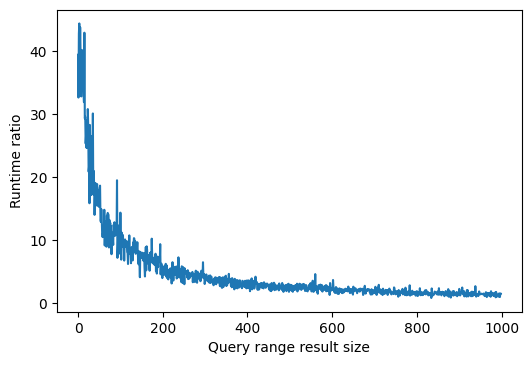

In [14]:
# Plot results
%matplotlib inline
plt.plot(time_ratios)
plt.xlabel('Query range result size')
plt.ylabel('Runtime ratio')
plt.show()

__Conclusion__

For 50,000 entries, we get a performance boost of at most 50 times.

We see that the performance boost decreases as the size of the of query increases. This is expected since the more result we return the closer we get to having to iterate of all entries in the tree.

With 100,000 entries the performance boost can go up to about 120 times.